## Basic Clustering

### Step 1: Import the relevant libraries

In [1]:
# Memory Leak code not necessary always
import os
os.environ["OMP_NUM_THREADS"] = "1"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.cluster import KMeans

### Step 2: Load the Data

In [2]:
data = pd.read_csv('data_files/clustering_country_clusters.csv')
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


### Step 3: Plot the Data

<function matplotlib.pyplot.show(close=None, block=None)>

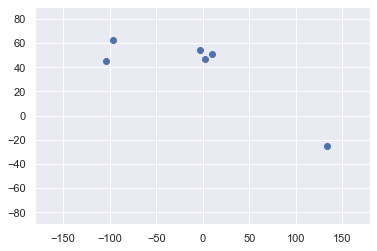

In [3]:
# With respect to the actual limits of latitude and longitude
plt.scatter(data['Longitude'],data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

### Step 4: Select the features (indepedent variable)

In [4]:
# Cluster based on location 
# DataFrame.iloc(row indices, column indices) - slices the data frame given rows and columns to be kept
x = data.iloc[:,1:3] # All rows, second and third columns

### Step 5: Clustering

In [5]:
kmeans = KMeans(2) # 2 clusters
kmeans.fit(x)

KMeans(n_clusters=2)

### Step 6: Cluserting Results

In [6]:
identified_cluster = kmeans.fit_predict(x)
identified_cluster

array([0, 0, 0, 0, 0, 1])

In [7]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_cluster
data_with_clusters

# USA, Canada, France, UK, and Germany are in cluster 0
# Australia is in cluster 1

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


<function matplotlib.pyplot.show(close=None, block=None)>

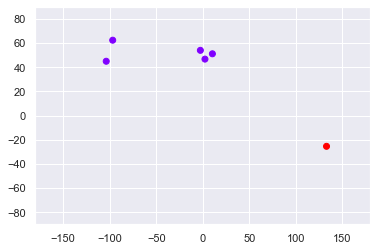

In [8]:
# Replot the data
plt.scatter(data['Longitude'],data['Latitude'], c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

### Step 7: Clustering with 3 Clusters

<function matplotlib.pyplot.show(close=None, block=None)>

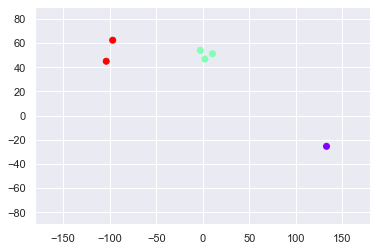

In [9]:
# Example with three clusters
kmeans = KMeans(3) # 2 clusters
kmeans.fit(x)
identified_cluster = kmeans.fit_predict(x)
identified_cluster

# Add cluster to dataset
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_cluster
data_with_clusters

# Replot the data
plt.scatter(data['Longitude'],data['Latitude'], c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

## Clustering Categorical Data

In [10]:
data = pd.read_csv('data_files/clustering_country_clusters.csv')
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


In [11]:
# Map the data
data_mapped = data.copy()
data_mapped['Language'] = data['Language'].map({'English':0, 'French':1, 'German':2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


In [12]:
# Selecting the features
x = data_mapped.iloc[:,3:4]
x 

,Language
0,0
1,0
2,1
3,0
4,2
5,0


In [13]:
# Clustering
# Example with three clusters
kmeans = KMeans(3) # 2 clusters
kmeans.fit(x)
identified_cluster = kmeans.fit_predict(x)
identified_cluster

# Add cluster to dataset
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_cluster
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,1
1,Canada,62.40,-96.80,English,1
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,1
4,Germany,51.15,10.40,German,2
5,Australia,-25.45,133.11,English,1


<function matplotlib.pyplot.show(close=None, block=None)>

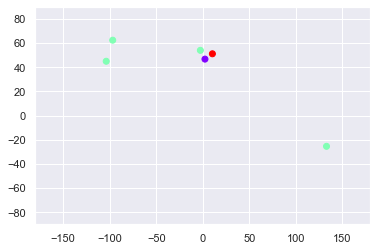

In [14]:
# Replot the data
plt.scatter(data['Longitude'],data['Latitude'], c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

In [15]:
# Trying with Categorical and Numerical Data
# Selecting the features
x = data_mapped.iloc[:,1:4]
x 

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


In [16]:
# Clustering
# Example with three clusters
kmeans = KMeans(2) 
identified_cluster = kmeans.fit_predict(x)
identified_cluster

# Add cluster to dataset
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_cluster
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


<function matplotlib.pyplot.show(close=None, block=None)>

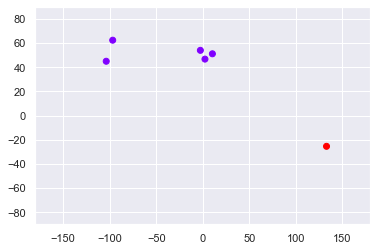

In [17]:
# Replot the data
plt.scatter(data['Longitude'],data['Latitude'], c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

## Selecting optimal number of Cluster via WCSS

Elbow method - Within Cluster Sum of Squares
minimizing WCSS will yield the perfect number of cluster

In [18]:
# WCSS
kmeans.inertia_

13208.958119999996

In [19]:
wcss=[]

for i in range(1,7):# Solve the problem with 1-6 clusters. Range is number of datapoints
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

wcss

[42605.41356666667,
 13208.958119999996,
 290.10523333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

Text(0, 0.5, 'Within-cluster sum of squares')

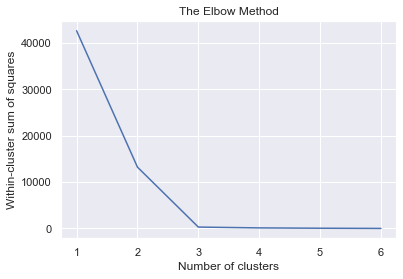

In [20]:
# Elbow Method
number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Within-cluster sum of squares")

# We can say that 3 is the best number of clusters

## Market Segmentation Example

In [21]:
# Memory Leak code not necessary always
import os
os.environ["OMP_NUM_THREADS"] = "1"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.cluster import KMeans

In [22]:
# Load the data
data = pd.read_csv('data_files/clustering_example.csv')
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


Text(0, 0.5, 'Loyalty')

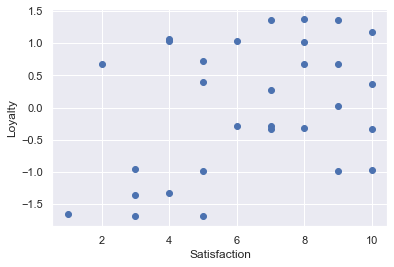

In [23]:
# Satisfaction - self reported - discrete 1 to 10
# Brand loyalty- measured by number of purchases in a year. Standardize (-2.5 to 2.5)

# Plot the data
plt.scatter(data['Satisfaction'], data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

In [24]:
# divide by 4
# Low satisfaction - High Loyalty
# Low satisfaction - low loyalty
# High satisfaction - high loyalty
# High satisfaction - low loyalty

In [25]:
# Select the features
x = data.copy()

In [26]:
# Clustering
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

Text(0, 0.5, 'Loyalty')

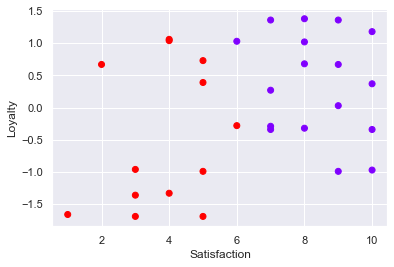

In [27]:
# Clustering results 
clusters = x.copy()
clusters['cluster_pred'] = kmeans.fit_predict(x)

# Plot the data
plt.scatter(data['Satisfaction'], data['Loyalty'], c=clusters['cluster_pred'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

# The algorithm only considered satisfaction as a feature, 
# because we did not standardize the variable. Satisfaction is higher than loyalty

In [28]:
# Standardize the variable
from sklearn import preprocessing
x_scaled = preprocessing.scale(x) # Will scale by column
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

In [29]:
# Take advantage of Elbow Method
wcss = []

for i in range(1,10): #Arbitrary decision on why 10
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

wcss

[59.999999999999986,
 29.818973034723143,
 17.913349527387968,
 10.247181805928422,
 7.792695153937187,
 6.586212092192189,
 5.326631124753926,
 4.4492366515919,
 3.7972682187482842]

Text(0, 0.5, 'WCSS')

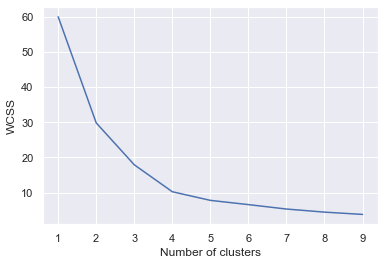

In [30]:
# Plot WCSS
plt.plot(range(1,10),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')


In [31]:
# Exploring cluster solutions and select the number of clusters
kmeans_new = KMeans(4)
kmeans_new.fit(x_scaled)

clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)

In [32]:
# Will show original values by cluster pred is based on standardized data
# Always do that
clusters_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,1
1,6,-0.28,3
2,5,-0.99,1
3,7,-0.29,3
4,4,1.06,2
5,1,-1.66,1
6,10,-0.97,3
7,8,-0.32,3
8,8,1.02,0
9,8,0.68,0


Text(0, 0.5, 'Loyalty')

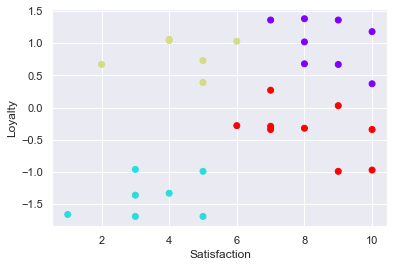

In [33]:
# Plot the data
plt.scatter(clusters_new['Satisfaction'], clusters_new['Loyalty'], c=clusters_new['cluster_pred'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')


In [34]:
# Name each group
# Light blue - Alienated
# Purple - Supporters
# Red - Fans
# Green - Roamers

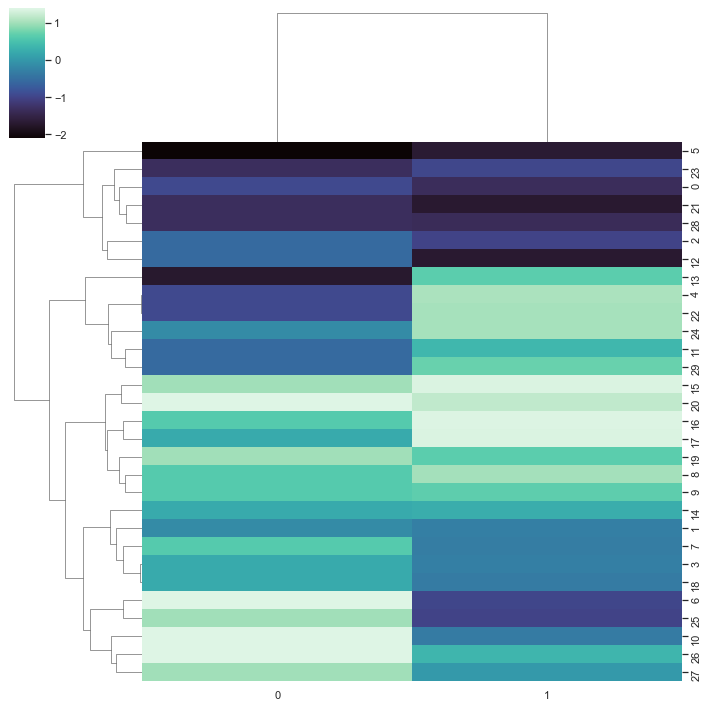

In [35]:
sns.clustermap(x_scaled, cmap ='mako')

## Dendogram

In [36]:
# Import relegvant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# Load the data
data = pd.read_csv('data_files/clustering_country_clusters_standardized.csv', index_col = 'Country') # Use entry in country as index in dataframe
data

,Latitude,Longitude,Language
Country,,,
USA,0.186540,-1.089160,0
Canada,0.728588,-1.008604,0
France,0.241895,0.137900,1
UK,0.467671,0.080922,0
Germany,0.378729,0.230360,2
Australia,-2.003422,1.648581,0


In [38]:
x_scaled = data.copy()
x_scaled = x_scaled.drop(['Language'], axis =1)
x_scaled

,Latitude,Longitude
Country,,
USA,0.186540,-1.089160
Canada,0.728588,-1.008604
France,0.241895,0.137900
UK,0.467671,0.080922
Germany,0.378729,0.230360
Australia,-2.003422,1.648581


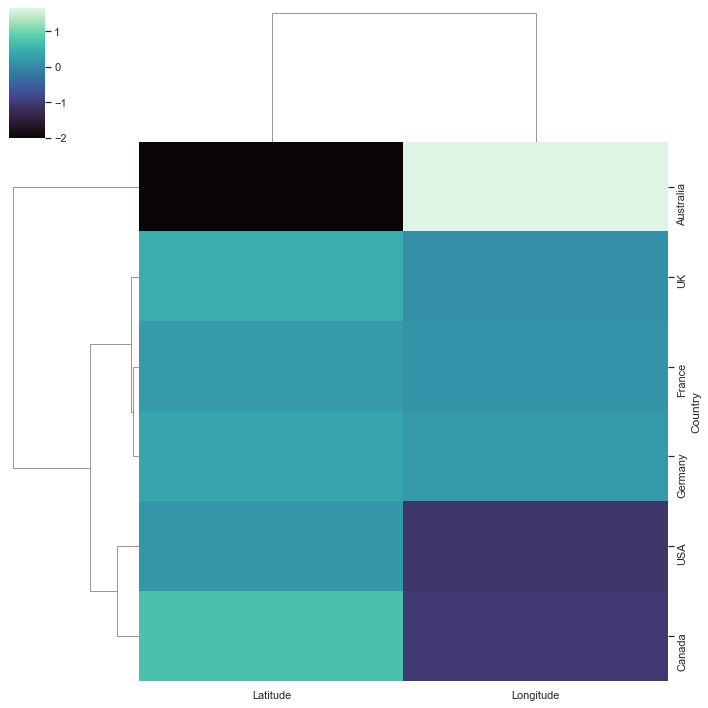

In [39]:
# Plot the data
sns.clustermap(x_scaled, cmap ='mako')